In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import missingno as msno
import seaborn as sns

In [4]:
a = pd.read_csv('../Data/raw_data/2019/1jan2019report.csv')
a

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,...,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,FLIGHTS,DISTANCE,Unnamed: 40
0,2019,1,1,16,3,2019-01-16,AA,19805,AA,N150UW,...,0001-0559,713,646.0,-27.0,0.0,0.0,0.0,1.0,280.0,NaN
1,2019,1,1,17,4,2019-01-17,AA,19805,AA,N563UW,...,0001-0559,713,705.0,-8.0,0.0,0.0,0.0,1.0,280.0,NaN
2,2019,1,1,18,5,2019-01-18,AA,19805,AA,N921US,...,0001-0559,713,659.0,-14.0,0.0,0.0,0.0,1.0,280.0,NaN
3,2019,1,1,19,6,2019-01-19,AA,19805,AA,N604AW,...,0001-0559,713,715.0,2.0,2.0,0.0,0.0,1.0,280.0,NaN
4,2019,1,1,20,7,2019-01-20,AA,19805,AA,N975UY,...,0001-0559,713,NaN,NaN,NaN,NaN,1.0,1.0,280.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,2019,1,1,30,3,2019-01-30,UA,19977,UA,N819UA,...,1400-1459,1525,1507.0,-18.0,0.0,0.0,0.0,1.0,191.0,NaN
583981,2019,1,1,30,3,2019-01-30,UA,19977,UA,N37462,...,1400-1459,1704,1707.0,3.0,3.0,0.0,0.0,1.0,1571.0,NaN
583982,2019,1,1,30,3,2019-01-30,UA,19977,UA,N37462,...,0800-0859,1310,1312.0,2.0,2.0,0.0,0.0,1.0,1571.0,NaN
583983,2019,1,1,30,3,2019-01-30,UA,19977,UA,N26967,...,1800-1859,2027,2049.0,22.0,22.0,1.0,0.0,1.0,1635.0,NaN


In [6]:
a['OP_UNIQUE_CARRIER'].nunique()

17

In [7]:
a['DEST'].nunique()

346

In [8]:
a['ORIGIN'].nunique()

346

In [11]:
b = pd.read_csv('../Data/raw_data/2021/jan 2021report.csv')
b

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,OP_CARRIER_FL_NUM,...,DEP_DELAY_GROUP,DEP_TIME_BLK,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,FLIGHTS,DISTANCE,Unnamed: 42
0,2021,1,1,5,2,2021-01-05,OO,20304,OO,3695,...,-1.0,1700-1759,2000.0,-10.0,0.0,0.0,0.0,1.0,584.0,NaN
1,2021,1,1,5,2,2021-01-05,OO,20304,OO,3696,...,-1.0,1400-1459,1653.0,-15.0,0.0,0.0,0.0,1.0,1097.0,NaN
2,2021,1,1,5,2,2021-01-05,OO,20304,OO,3698,...,-1.0,0900-0959,1040.0,-27.0,0.0,0.0,0.0,1.0,337.0,NaN
3,2021,1,1,5,2,2021-01-05,OO,20304,OO,3700,...,-1.0,1700-1759,1819.0,-15.0,0.0,0.0,0.0,1.0,337.0,NaN
4,2021,1,1,5,2,2021-01-05,OO,20304,OO,3701,...,-1.0,1800-1859,1950.0,-14.0,0.0,0.0,0.0,1.0,866.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361423,2021,1,1,17,7,2021-01-17,DL,19790,DL,1082,...,-1.0,0001-0559,844.0,-21.0,0.0,0.0,0.0,1.0,907.0,NaN
361424,2021,1,1,17,7,2021-01-17,DL,19790,DL,1083,...,-1.0,0700-0759,1035.0,5.0,5.0,0.0,0.0,1.0,1249.0,NaN
361425,2021,1,1,17,7,2021-01-17,DL,19790,DL,1084,...,0.0,1900-1959,2114.0,-11.0,0.0,0.0,0.0,1.0,907.0,NaN
361426,2021,1,1,17,7,2021-01-17,DL,19790,DL,1087,...,-1.0,1200-1259,1521.0,-6.0,0.0,0.0,0.0,1.0,1076.0,NaN


In [3]:
df_2019 = pd.read_csv('df_2019final.csv')

In [12]:
583 + 533 + 632+612+636+659+568+605+625+602+636


6691

In [14]:
313+376+371+574+607+352+223+648+181+364+352+323+332+361


5377

In [4]:
df_2020 = pd.read_csv('df_2020final.csv')

In [5]:
df_2019.shape

(3858536, 25)

In [6]:
df_2020.shape

(2253704, 25)

In [7]:
df_19_20 = pd.concat([df_2019, df_2020])

In [8]:
df_19_20.shape

(6112240, 25)

In [9]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df_19_20, title='Report')
# profile

In [10]:
#profile.to_file(output_file="EDA_capstone.html")

In [11]:
# #correlation matrix
# corrmat = df_19_20.corr()
# f, ax = plt.subplots(figsize=(20, 12))
# sns.heatmap(corrmat,  vmax=.8, square=True,annot=True);
# plt.show()

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
df_19_20

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,FLIGHTS,DISTANCE
0,2019,1,1,4,5,2019-01-04,DL,LGA,NY,New York,MSP,MN,Minnesota,1055,1052.0,-3.0,0.0,0.0,1237.0,-50.0,0.0,0.0,0.0,1.0,1020.0
1,2019,1,1,4,5,2019-01-04,DL,LGA,NY,New York,PBI,FL,Florida,805,806.0,1.0,1.0,0.0,1058.0,-4.0,0.0,0.0,0.0,1.0,1035.0
2,2019,1,1,4,5,2019-01-04,DL,ATL,GA,Georgia,BNA,TN,Tennessee,826,834.0,8.0,8.0,0.0,825.0,-9.0,0.0,0.0,0.0,1.0,214.0
3,2019,1,1,4,5,2019-01-04,DL,BNA,TN,Tennessee,ATL,GA,Georgia,918,916.0,-2.0,0.0,0.0,1129.0,-1.0,0.0,0.0,0.0,1.0,214.0
4,2019,1,1,4,5,2019-01-04,DL,MCO,FL,Florida,JFK,NY,New York,2035,2040.0,5.0,5.0,0.0,2257.0,-19.0,0.0,0.0,0.0,1.0,944.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253699,2020,4,12,23,3,2020-12-23,WN,MKE,WI,Wisconsin,DAL,TX,Texas,1415,1414.0,-1.0,0.0,0.0,1638.0,-12.0,0.0,0.0,0.0,1.0,850.0
2253700,2020,4,12,23,3,2020-12-23,WN,MKE,WI,Wisconsin,DCA,VA,Virginia,1210,1231.0,21.0,21.0,1.0,1502.0,2.0,2.0,0.0,0.0,1.0,634.0
2253701,2020,4,12,23,3,2020-12-23,WN,MKE,WI,Wisconsin,DEN,CO,Colorado,1825,1904.0,39.0,39.0,1.0,2025.0,25.0,25.0,1.0,0.0,1.0,896.0
2253702,2020,4,12,23,3,2020-12-23,WN,MKE,WI,Wisconsin,DEN,CO,Colorado,600,556.0,-4.0,0.0,0.0,714.0,-36.0,0.0,0.0,0.0,1.0,896.0


In [30]:
df_19_20.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM',
       'DEST', 'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'CANCELLED', 'FLIGHTS', 'DISTANCE'],
      dtype='object')

In [31]:
df_19_20

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,FLIGHTS,DISTANCE
0,2019,1,1,4,5,2019-01-04,DL,LGA,NY,New York,MSP,MN,Minnesota,1055,1052.0,-3.0,0.0,0.0,1237.0,-50.0,0.0,0.0,0.0,1.0,1020.0
1,2019,1,1,4,5,2019-01-04,DL,LGA,NY,New York,PBI,FL,Florida,805,806.0,1.0,1.0,0.0,1058.0,-4.0,0.0,0.0,0.0,1.0,1035.0
2,2019,1,1,4,5,2019-01-04,DL,ATL,GA,Georgia,BNA,TN,Tennessee,826,834.0,8.0,8.0,0.0,825.0,-9.0,0.0,0.0,0.0,1.0,214.0
3,2019,1,1,4,5,2019-01-04,DL,BNA,TN,Tennessee,ATL,GA,Georgia,918,916.0,-2.0,0.0,0.0,1129.0,-1.0,0.0,0.0,0.0,1.0,214.0
4,2019,1,1,4,5,2019-01-04,DL,MCO,FL,Florida,JFK,NY,New York,2035,2040.0,5.0,5.0,0.0,2257.0,-19.0,0.0,0.0,0.0,1.0,944.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253699,2020,4,12,23,3,2020-12-23,WN,MKE,WI,Wisconsin,DAL,TX,Texas,1415,1414.0,-1.0,0.0,0.0,1638.0,-12.0,0.0,0.0,0.0,1.0,850.0
2253700,2020,4,12,23,3,2020-12-23,WN,MKE,WI,Wisconsin,DCA,VA,Virginia,1210,1231.0,21.0,21.0,1.0,1502.0,2.0,2.0,0.0,0.0,1.0,634.0
2253701,2020,4,12,23,3,2020-12-23,WN,MKE,WI,Wisconsin,DEN,CO,Colorado,1825,1904.0,39.0,39.0,1.0,2025.0,25.0,25.0,1.0,0.0,1.0,896.0
2253702,2020,4,12,23,3,2020-12-23,WN,MKE,WI,Wisconsin,DEN,CO,Colorado,600,556.0,-4.0,0.0,0.0,714.0,-36.0,0.0,0.0,0.0,1.0,896.0


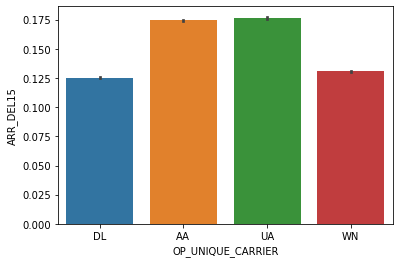

<Figure size 2160x1080 with 0 Axes>

In [33]:
sns.barplot( data = df_19_20, y = 'ARR_DEL15' , x = 'OP_UNIQUE_CARRIER' );

plt.figure(figsize=(30,15));

In [15]:
largest_5 =df_19_20.groupby('ORIGIN').nlargest(10)

AttributeError: 'DataFrameGroupBy' object has no attribute 'nlargest'

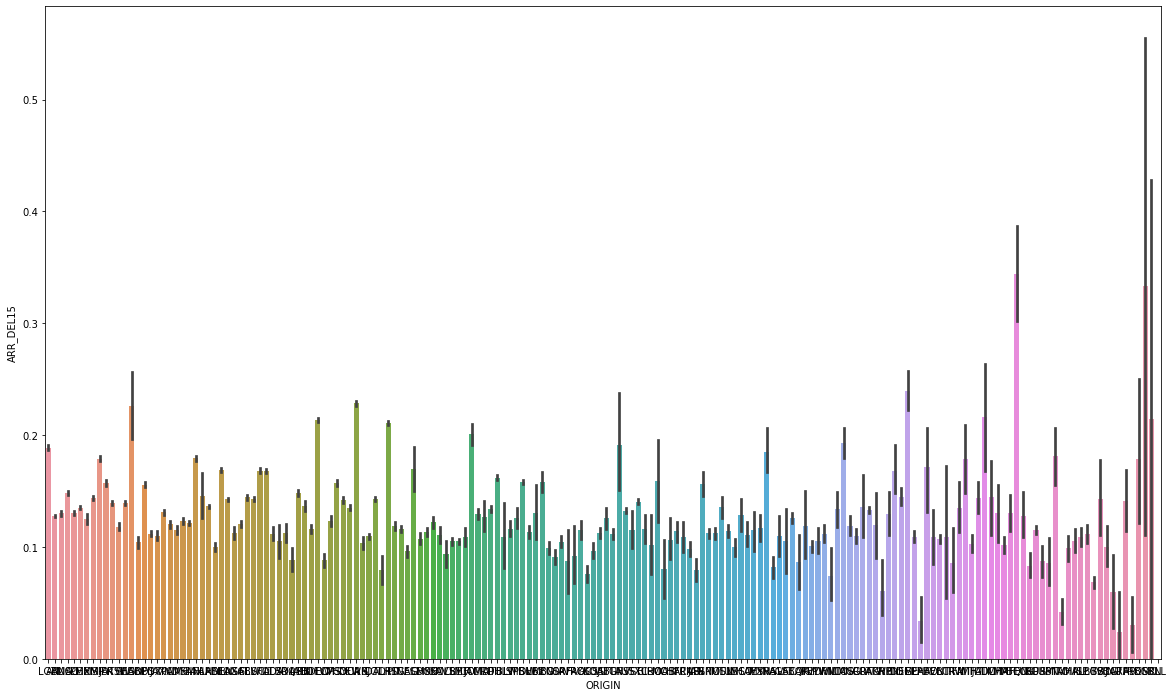

In [13]:
plt.figure(figsize=(20, 12))

sns.barplot( data = df_19_20, y = 'ARR_DEL15' , x = 'ORIGIN' );

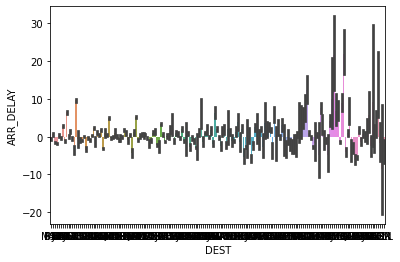

<Figure size 2880x1440 with 0 Axes>

In [35]:
sns.barplot( data = df_19_20, y = 'ARR_DELAY' , x = ['DEST'] );

plt.figure(figsize=(40,20));

/Users/bjackany/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


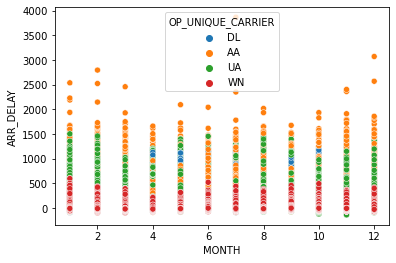

<Figure size 2880x1800 with 0 Axes>

In [39]:
sns.scatterplot( data = df_19_20, y = 'ARR_DELAY' , x = 'MONTH', hue = 'OP_UNIQUE_CARRIER');

plt.figure(figsize=(40,25));

In [ ]:
sns.scatterplot( data = df_19_20, y = 'ARR_DEL15'  , x = 'FL_DATE', hue = 'OP_UNIQUE_CARRIER');

plt.figure(figsize=(40,25));

In [42]:
df_atl = df_19_20[df_19_20.ORIGIN == 'ATL']

In [63]:
df_atl.head(2)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,FLIGHTS,DISTANCE
2,2019,1,1,4,5,2019-01-04,DL,ATL,GA,Georgia,BNA,TN,Tennessee,826,834.0,8.0,8.0,0.0,825.0,-9.0,0.0,0.0,0.0,1.0,214.0
12,2019,1,1,4,5,2019-01-04,DL,ATL,GA,Georgia,LAX,CA,California,1622,1622.0,0.0,0.0,0.0,1806.0,-19.0,0.0,0.0,0.0,1.0,1947.0


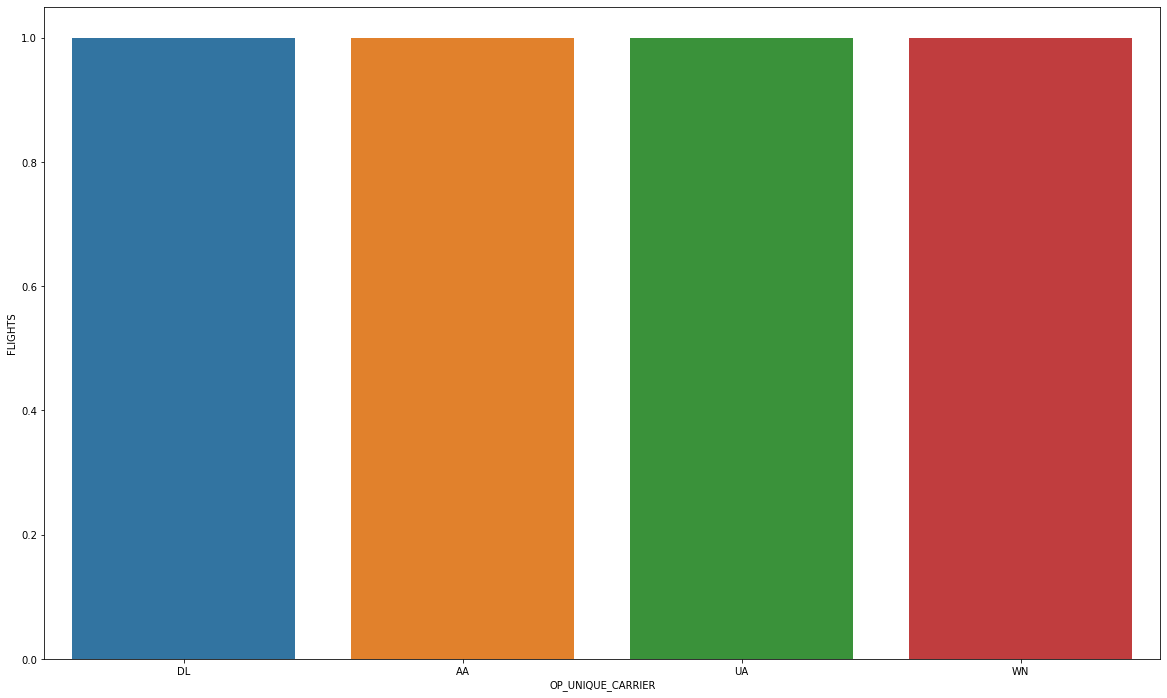

In [70]:
plt.figure(figsize=(20, 12))
sns.barplot( data = df_atl, y =  'FLIGHTS'  , x = 'OP_UNIQUE_CARRIER' );

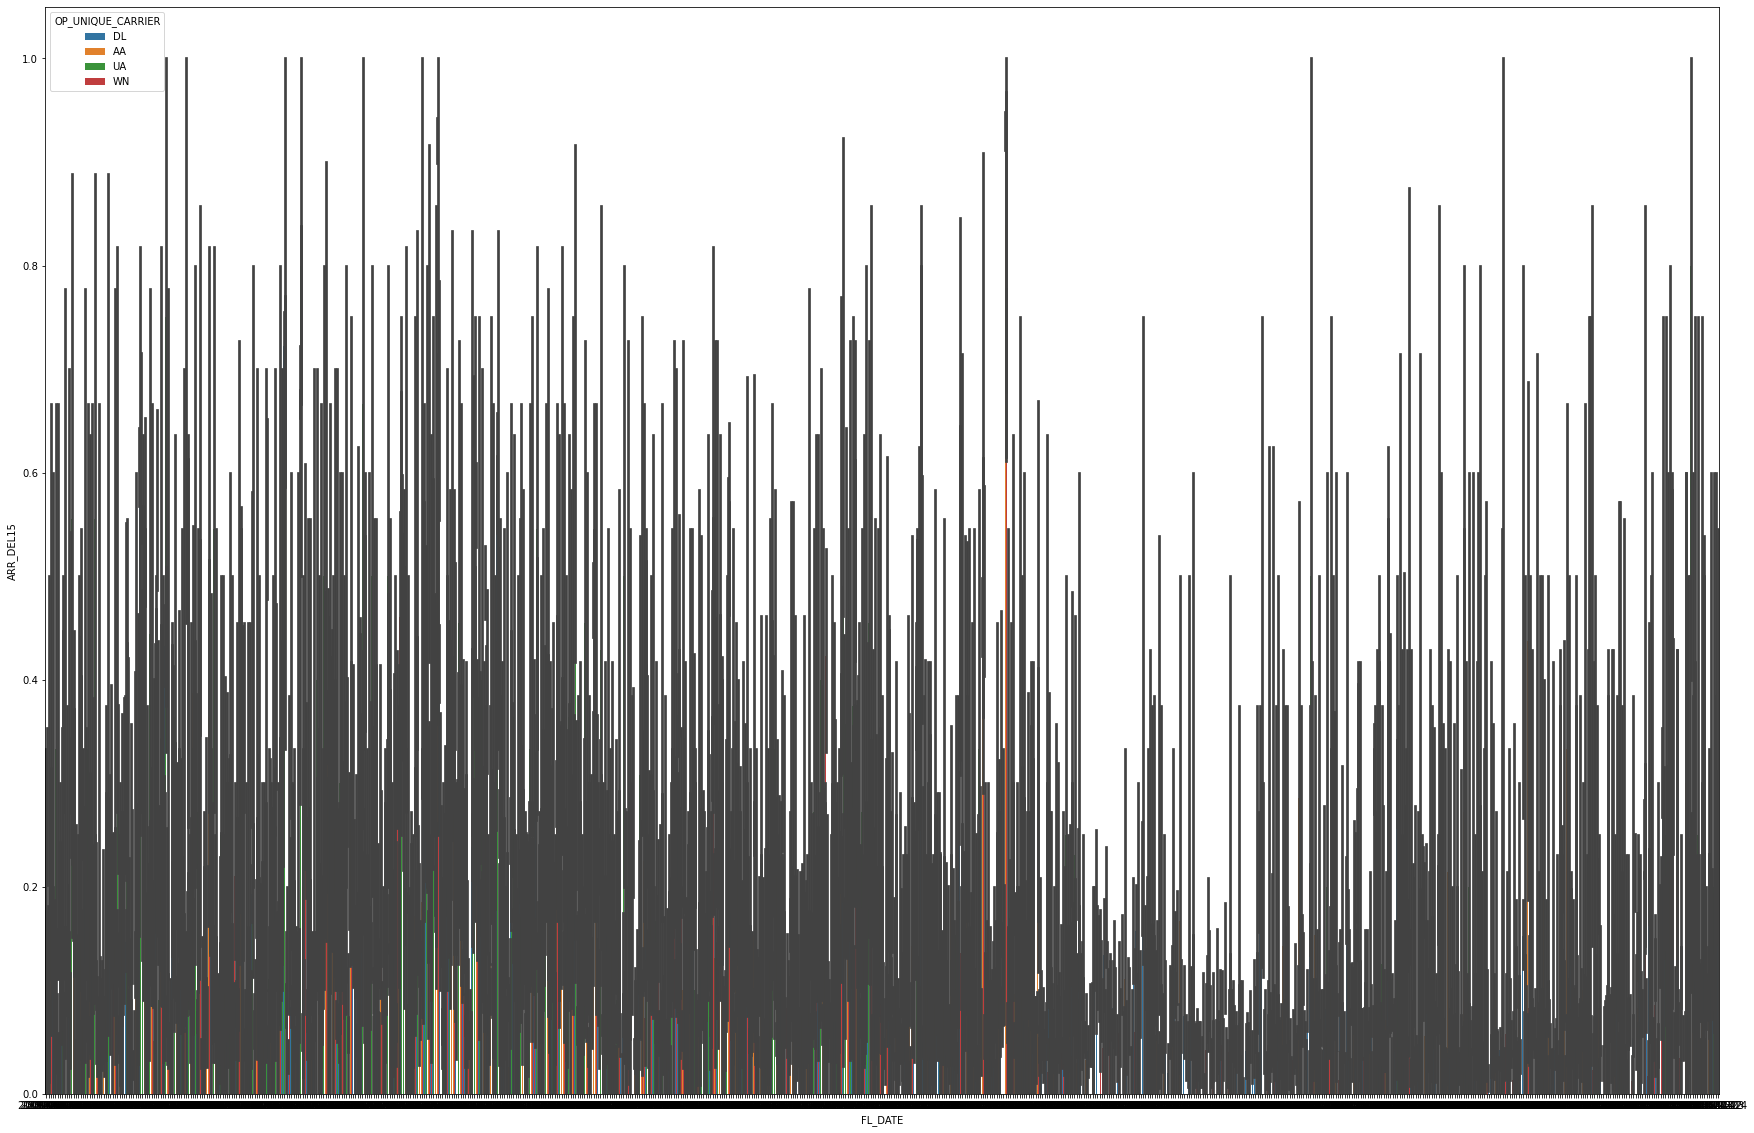

In [62]:
plt.figure(figsize=(30, 20))
sns.barplot( data = df_atl, y =  'ARR_DEL15'  , x = 'FL_DATE', hue = 'OP_UNIQUE_CARRIER');

In [76]:
a = df_19_20.groupby('ORIGIN').count()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,FLIGHTS,DISTANCE
ORIGIN,,,,,,,,,,,,,,,,,,,,,,,,
ABE,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403
ABQ,23951,23951,23951,23951,23951,23951,23951,23951,23951,23951,23951,23951,23951,23951,23951,23951,23951,23951,23951,23951,23951,23951,23951,23951
AGS,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054
ALB,10381,10381,10381,10381,10381,10381,10381,10381,10381,10381,10381,10381,10381,10381,10381,10381,10381,10381,10381,10381,10381,10381,10381,10381
AMA,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TUS,15034,15034,15034,15034,15034,15034,15034,15034,15034,15034,15034,15034,15034,15034,15034,15034,15034,15034,15034,15034,15034,15034,15034,15034
TVC,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399
TYS,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171


In [86]:
df_19_20.groupby(['ORIGIN']).

<bound method boxplot_frame_groupby of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f92a0a60070>>

In [ ]:
df_19_20.groupby(['ORIGIN'])['count'].nlargest(3)

In [12]:
df = df_19_20.drop(['QUARTER','ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW','ARR_TIME', 'ARR_DELAY','ARR_DELAY_NEW','CANCELLED' ], axis = 1)

In [87]:
#df.

AttributeError: 'DataFrame' object has no attribute 'cat_response'

In [14]:
df.isnull().sum()

YEAR                 0
MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
FL_DATE              0
OP_UNIQUE_CARRIER    0
ORIGIN               0
DEST                 0
DEST_STATE_ABR       0
DEP_DEL15            0
ARR_DEL15            0
FLIGHTS              0
DISTANCE             0
dtype: int64

In [15]:
df.dtypes

YEAR                   int64
MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
FL_DATE               object
OP_UNIQUE_CARRIER     object
ORIGIN                object
DEST                  object
DEST_STATE_ABR        object
DEP_DEL15            float64
ARR_DEL15            float64
FLIGHTS              float64
DISTANCE             float64
dtype: object

In [16]:
df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DEST_STATE_ABR', 'DEP_DEL15',
       'ARR_DEL15', 'FLIGHTS', 'DISTANCE'],
      dtype='object')

In [18]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title='Report')
# profile
# profile.to_file(output_file="df_EDA.html")

<AxesSubplot:>

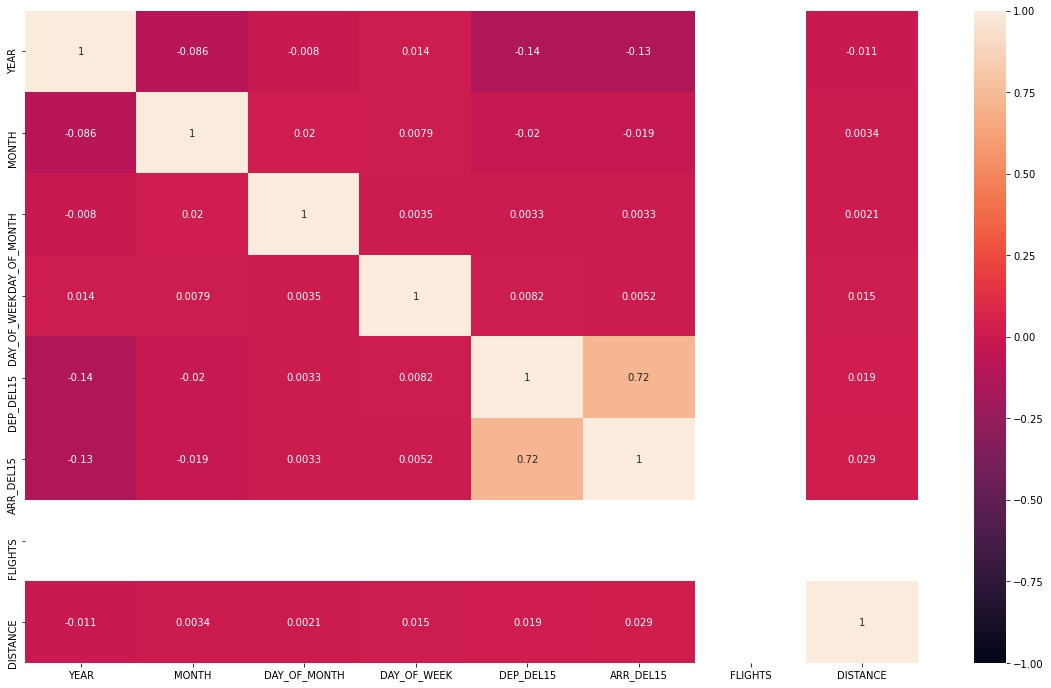

In [22]:
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True , vmin=-1, vmax=1)

<AxesSubplot:xlabel='MONTH', ylabel='FLIGHTS'>

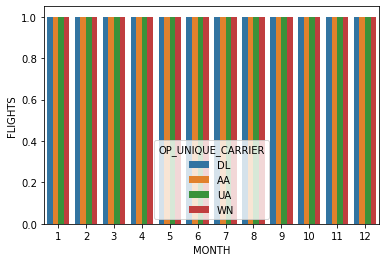

In [29]:
sns.barplot( x = 'MONTH', y ='FLIGHTS', data = df, hue = 'OP_UNIQUE_CARRIER')

In [ ]:
df.cat

In [ ]:
#df_2019_2020['FL_DATE'] = pd.to_datetime(df_2019_2020['FL_DATE'])
#df_2019_2020.info()

In [ ]:
#df_2019_2020.set_index('FL_DATE' , inplace=True)

In [ ]:
#df_2019_2020.info()

In [ ]:
#df_2019_2020.to_csv('df_final.csv', index= False)

In [ ]:
#df_2019_2020.sort_index(inplace = True)

In [ ]:
#df_2019_2020.isna().sum()

In [ ]:
#df_2019_2020.info()

In [ ]:
#df_2019_2020.info()

In [ ]:
#df_2019_2020.columns

In [ ]:
#df_2019_2020.loc['2019']

In [ ]:
#alpha = df_2019_2020.resample('W').max()

In [ ]:
#alpha['ORIGIN'].plot(figsize = (12, 4));

In [ ]:
# #sns.scatterplot( x = "YEAR", y = "ARR_DELAY", data = "alpha", hue = 'OP_UNIQUE_CARRIER')
# df_2019_2020[['FLIGHTS']].plot(figsize = (30, 20));
# plt.xticks(fontsize = 20)
# plt.yticks(fontsize = 20);

In [ ]:
delta = df_2019_2020[df_2019_2020['OP_UNIQUE_CARRIER'] == "DL"]

In [ ]:
delta.shape

In [ ]:
american = df_2019_2020[df_2019_2020['OP_UNIQUE_CARRIER'] == "AA"]

In [ ]:
american.shape

In [ ]:
united = df_2019_2020[df_2019_2020['OP_UNIQUE_CARRIER'] == "UA"]

In [ ]:
united.shape

In [ ]:
southwest = df_2019_2020[df_2019_2020['OP_UNIQUE_CARRIER'] == "WN"]

In [ ]:
southwest.shape

In [ ]:
#delta['DISTANCE'].plot(figsize = (12, 4))

plt.figure(figsize=(25,15))
ax = sns.barplot( x = 'ORIGIN_STATE_ABR', y = 'ARR_DEL15', data = delta, estimator= sum , ci =None )
#ax.set_title('HOUSE SALES BY YEAR IN AMES, IA', fontsize = 25)
#ax.set_ylabel('SALE PRICE (USD)', fontsize = 20)
#ax.set_xlabel('YEAR SOLD', fontsize = 20)
#plt.xticks(fontsize = 20);

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot( x = 'ARR_DEL15', y = 'FLIGHTS', data = df_2019, estimator= sum, ci = None, hue = 'OP_UNIQUE_CARRIER' )

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot( x = 'DEP_DEL15', y = 'FLIGHTS', data = df_2019, estimator= sum, ci = None, hue = 'OP_UNIQUE_CARRIER' )

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot( x = 'OP_UNIQUE_CARRIER' , y = 'FLIGHTS', data = df_2019, estimator= sum, ci = None)

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot( x = 'OP_UNIQUE_CARRIER' , y = 'FLIGHTS', data = df_2020, estimator= sum, ci = None)

In [ ]:
sns.histplot(df_2019['OP_UNIQUE_CARRIER']);

In [ ]:
DEP_DEL15

In [ ]:
df_2019.columns

In [ ]:
df_2019['DISTANCE'].plot()

In [ ]:
df = df.drop(['DEP_DELAY_GROUP'], axis = 1)

In [ ]:
df_2019.shape

In [ ]:
df_2020 = df_2020.drop(['DEP_DELAY_GROUP'], axis = 1)

In [ ]:
df_2019.columns

In [ ]:
df_2019.shape

In [ ]:
df_2020.shape

In [ ]:
df.shape

In [ ]:
df.to_csv('df_final.csv', index= False)

In [ ]:
df_2019.to_csv('df_2019final.csv', index= False)

In [ ]:
df_2020.to_csv('df_2020final.csv', index= False)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.head()